In [1]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.footprints import algorithm as footprints_discovery
from pm4py.visualization.footprints import visualizer as fp_visualizer

In [2]:
# Preparing the data
events = pd.read_csv('interval_event_log_with_artificial_resources.csv')
events['starttime'] = pd.to_datetime(events['starttime'])
events['endtime'] = pd.to_datetime(events['endtime'])
events.rename(columns={'endtime': 'time:timestamp', 'starttime': 'start_timestamp', 'orderID': 'case:concept:name', 'activity': 'concept:name', 'resource': 'org:resource'}, inplace=True)

## Convert to log format
log = log_converter.apply(events)

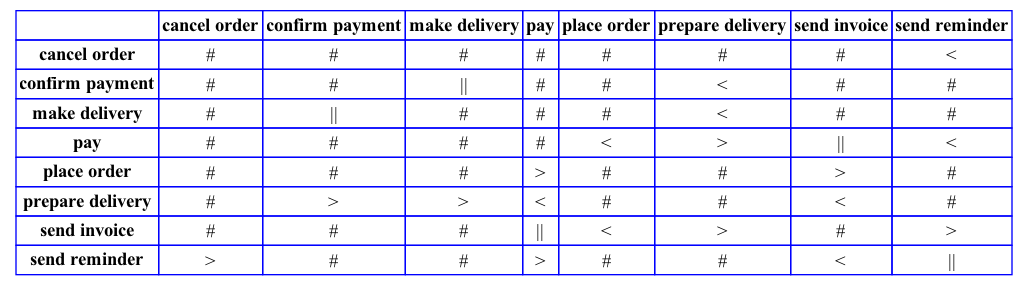

In [3]:
# Exercise 3: Footprints
fp_log = footprints_discovery.apply(log, variant=footprints_discovery.Variants.ENTIRE_EVENT_LOG)
gviz = fp_visualizer.apply(fp_log)
fp_visualizer.view(gviz)